In [57]:
import pandas as pd

In [58]:
df = pd.read_csv('dataset/predictive_maintenance.csv', header=0)

In [59]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [60]:
df.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [66]:
# check for null values 
null_count = df.isnull().sum()
print(null_count)

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64


In [67]:
# checks for balanced dataset 
df["failure"].value_counts()

0    124388
1       106
Name: failure, dtype: int64

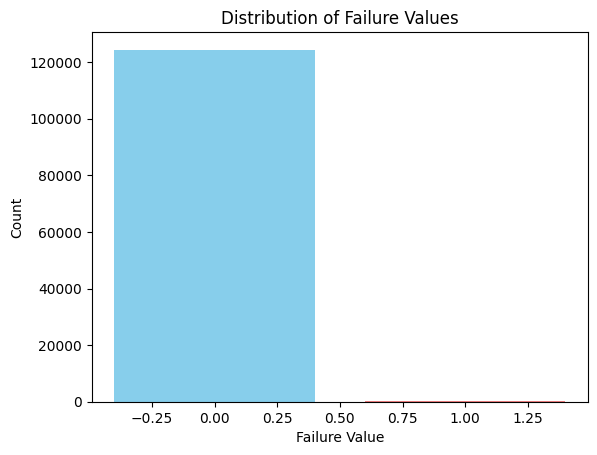

In [68]:
import matplotlib.pyplot as plt

values = df["failure"].value_counts().sort_index()  # Count occurrences
labels = values.index.to_numpy()  # Extract labels
counts = values.to_numpy()  # Extract counts

plt.bar(labels, counts, color=["skyblue", "lightcoral"])  # Set colors for each value
plt.xlabel("Failure Value")
plt.ylabel("Count")
plt.title("Distribution of Failure Values")
plt.xticks(rotation=0)  # Rotate labels for readability
plt.show()

In [70]:
# # Pie chart 
# data = [values[0], values[1]]
# labels = ["Non Failures", "Failures"]

# plt.pie(data, labels=labels, autopct="%1.3f%%")  # Show percentages on chart
# plt.title("Comparison of Values")
# plt.show()

In [71]:
# failed machines 
failed_machines = df[df['failure']==1]
failed_machines.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
4885,1/5/15,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
6879,1/7/15,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
8823,1/9/15,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,8,0
11957,1/13/15,W1F13SRV,1,188251248,2040,0,0,6,39345,32,32,1
12668,1/14/15,W1F1230J,1,220461296,0,0,0,14,325125,0,0,0


In [72]:
failed_machines.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,106.0,1.060000e+02,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,1.0,1.271755e+08,4109.433962,3.905660,54.632075,15.462264,258303.481132,30.622642,30.622642,23.084906
std,0.0,6.940167e+07,12803.747239,31.557213,193.492528,15.547270,103349.308593,117.033610,117.033610,153.449984
min,1.0,4.527376e+06,0.000000,0.000000,0.000000,3.000000,24.000000,0.000000,0.000000,0.000000
25%,1.0,7.046235e+07,0.000000,0.000000,0.000000,8.000000,230028.750000,0.000000,0.000000,0.000000
50%,1.0,1.391173e+08,0.000000,0.000000,1.500000,10.000000,267648.500000,0.000000,0.000000,0.000000
75%,1.0,1.837066e+08,1182.000000,0.000000,18.750000,14.000000,309156.000000,16.000000,16.000000,1.000000
max,1.0,2.432612e+08,64784.000000,318.000000,1666.000000,91.000000,574599.000000,832.000000,832.000000,1165.000000


In [73]:
# Non failed machines
non_failed_machines = df[df['failure']==0]
non_failed_machines.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [74]:
non_failed_machines.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124388.0,1.243880e+05,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000
mean,0.0,1.223840e+08,156.118725,9.945598,1.696048,14.221613,260174.250587,0.266682,0.266682,12.442462
std,0.0,7.046036e+07,2145.521965,185.824103,22.164316,15.943381,99147.843106,6.558071,6.558071,191.455015
min,0.0,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.0,6.126677e+07,0.000000,0.000000,0.000000,8.000000,221451.000000,0.000000,0.000000,0.000000
50%,0.0,1.227861e+08,0.000000,0.000000,0.000000,10.000000,249794.000000,0.000000,0.000000,0.000000
75%,0.0,1.833093e+08,0.000000,0.000000,0.000000,12.000000,310266.250000,0.000000,0.000000,0.000000
max,0.0,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [47]:
# metric 2,4,8 pretty important
# metric 7 & 8 are copies

In [77]:
# correlation matrix 
correlation_matrix = df.corr(numeric_only="silence")

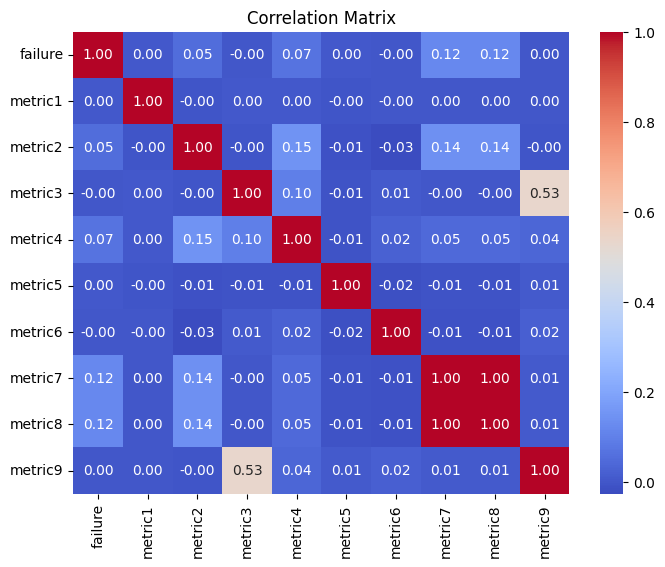

In [79]:
import seaborn as sns
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")  # Customize colors and formatting
plt.title("Correlation Matrix")
plt.show()